In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Phân vùng ảnh bằng cắt ngưỡng toàn cục (thủ công)


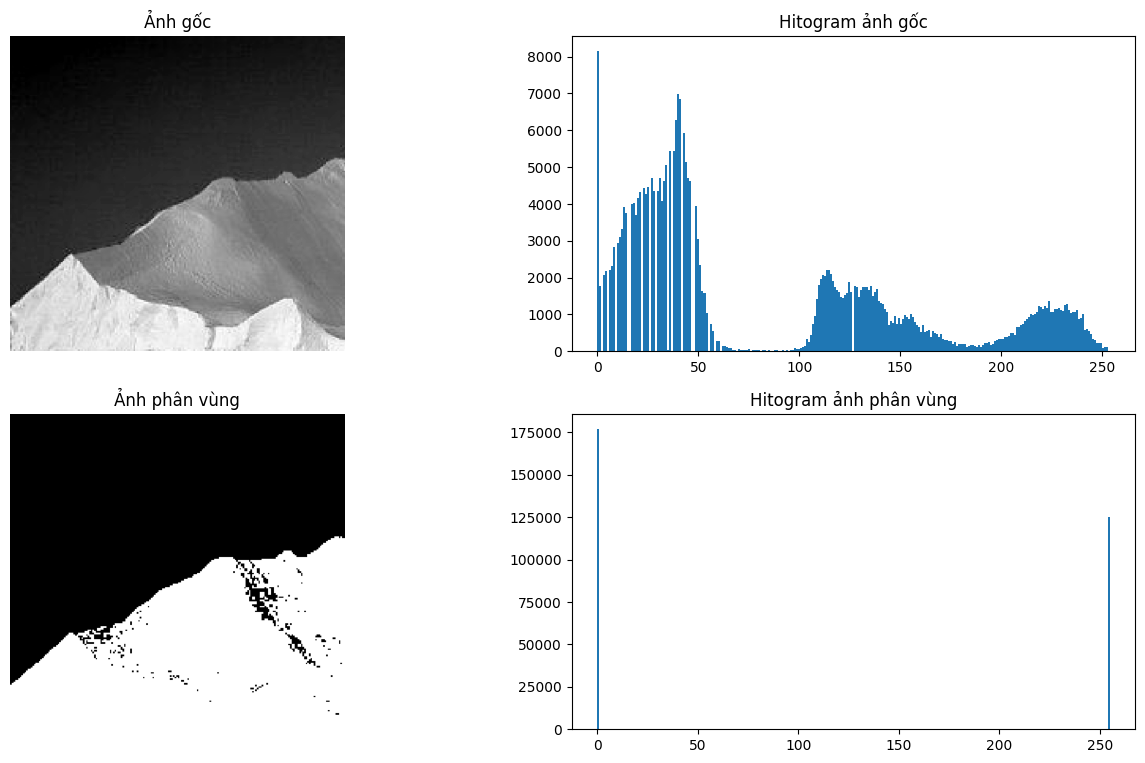

In [ ]:
def phan_vung_bang_cat_nguong_toan_cuc(img,nguong):
    m, n = img.shape
    img_phan_vung_cat_nguong = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            if (img[i,j] < nguong):
                img_phan_vung_cat_nguong[i,j] = 0
            else:
                img_phan_vung_cat_nguong[i,j] = 255
    return img_phan_vung_cat_nguong

if __name__ == "__main__":
    img_goc = cv2.imread('/content/gdrive/MyDrive/python/test2.tif',0)
    nguong = 110

    img_phan_vung = phan_vung_bang_cat_nguong_toan_cuc(img_goc,nguong)

    fig2 = plt.figure(figsize=(16, 9))

    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
    # Hiển thị ảnh gốc
    ax1.imshow(img_goc, cmap='gray')
    ax1.set_title('Ảnh gốc')
    ax1.axis('off')

    # Hiển thị histogram ảnh gốc
    ax2.hist(img_goc.flatten(), bins=256)
    ax2.set_title('Hitogram ảnh gốc')

    # Hiển thị ảnh phân vùng
    ax3.imshow(img_phan_vung, cmap='gray')
    ax3.set_title('Ảnh phân vùng')
    ax3.axis('off')

    # Hiển thị histogram ảnh phân vùng
    ax4.hist(img_phan_vung.flatten(), bins=256)
    ax4.set_title('Hitogram ảnh phân vùng')
    plt.show()

Thuật toán tìm ngưỡng toàn cục cơ bản

[190.86347801451697]
Ngưỡng tìm được:  [190.86347801451697, 190.4566464591048, 190.4566464591048]


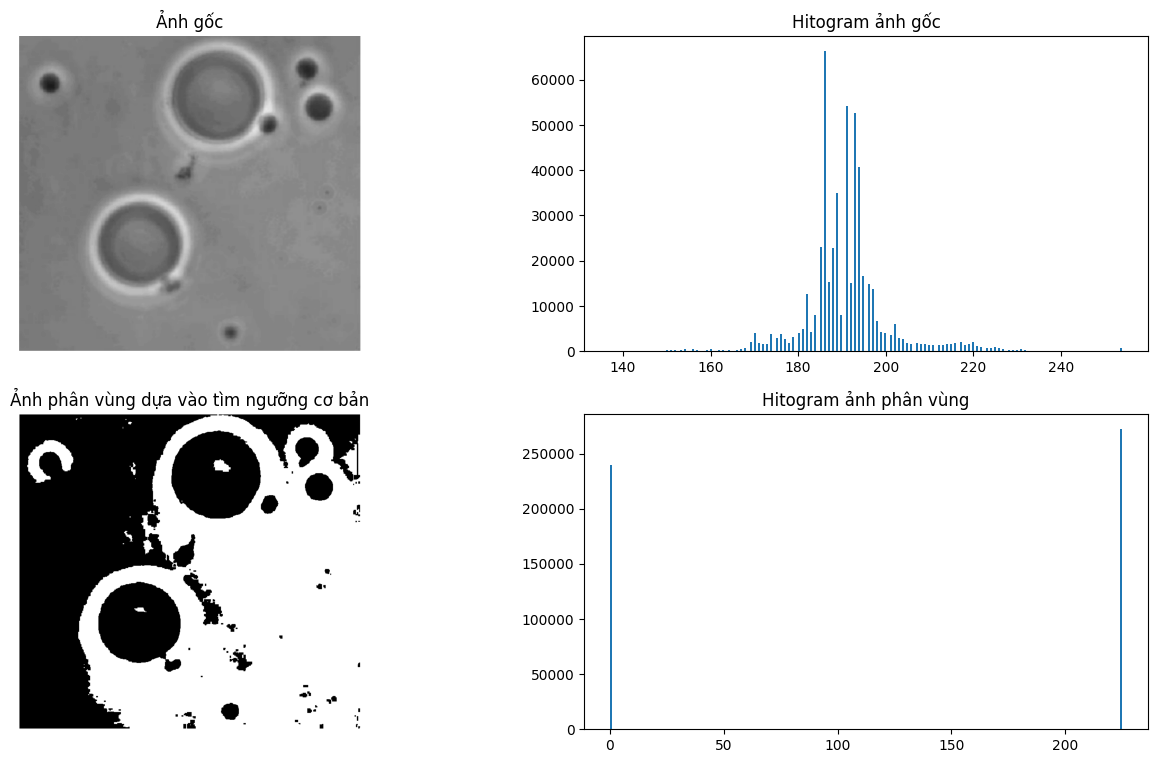

In [ ]:
def Tim_nguong_toan_cuc(img):
    #Bước 1. Khởi tạo ngưỡng ban đầu t bằng giá trị trung bình mức xám của ảnh
    t=[np.mean(img)]
    # t_value =[]
    # t=np.mean(img)
    g1 = []
    g2 = []
    m,n = img.shape
    # Lặp để tính ngưỡng
    print(t)
    while (True):
        # Bước 2. Tạo nhóm g1,g2 dựa trên ngưỡng t
        for i in range(m):
            for j in range(n):
                if (img[i,j] < t[-1]):
                    g1.append(img[i,j])
                else:
                    g2.append(img[i,j])
        # Bước 3. Tính trung bình mức xám trong vùng g1,g2
        mu1 = np.mean(g1)
        mu2 = np.mean(g2)
        # Bước 4. Tính lại ngưỡng t mới
        # t = ((mu1+ mu2)/2)
        # t_value.append(t)
        t.append(((mu1+ mu2)/2))
        if(abs(t[-1]-t[-2])==0):
          break
        # Tính delta t để làm điều kiện thoát vòng lặp
        # t0 = t
        # delta_t = abs(t-t0)
        # if(delta_t < 1):
            # break
    # print(t_value)
    print("Ngưỡng tìm được: ",t)
    return t

def phan_vung_bang_cat_nguong_toan_cuc_co_ban(img,nguong):
    m, n = img.shape
    img_phan_vung_cat_nguong = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            if (img[i,j] < nguong):
                img_phan_vung_cat_nguong[i,j] = 0
            else:
                img_phan_vung_cat_nguong[i,j] = 225
    return img_phan_vung_cat_nguong

if __name__ == "__main__":
    img_goc = cv2.imread("/content/gdrive/MyDrive/python/image1.png",0)

    T = Tim_nguong_toan_cuc(img_goc)
    img_phan_vung = phan_vung_bang_cat_nguong_toan_cuc_co_ban(img_goc,T[-1])

    fig2 = plt.figure(figsize=(16, 9))

    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
    # Hiển thị ảnh gốc
    ax1.imshow(img_goc, cmap='gray', alpha = 0.9)
    ax1.set_title('Ảnh gốc')
    ax1.axis('off')

    # Hiển thị histogram ảnh gốc
    ax2.hist(img_goc.flatten(),bins=256)
    ax2.set_title('Hitogram ảnh gốc')

    # Hiển thị ảnh phân vùng
    ax3.imshow(img_phan_vung, cmap='gray')
    ax3.set_title('Ảnh phân vùng dựa vào tìm ngưỡng cơ bản')
    ax3.axis('off')

    # Hiển thị histogram ảnh phân vùng
    ax4.hist(img_phan_vung.flatten(), bins=256)
    ax4.set_title('Hitogram ảnh phân vùng')
    plt.show()


Thuật toán Otsu

Ngưỡng tìm được 200


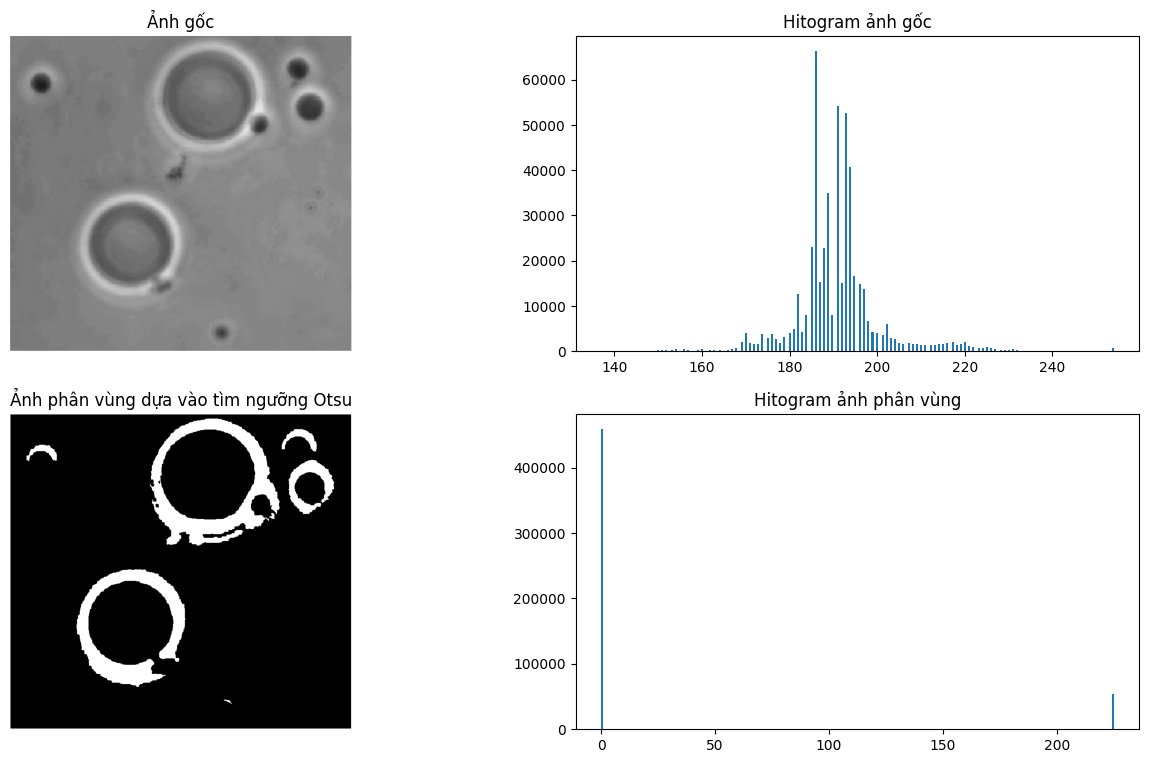

In [ ]:
def otsu(img):
    phuong_sai_t = 0
    M,N= img.shape
    mG = np.mean(img)   # Tính mG giá trị trung bình mức xám của ảnh theo công thức 6

    for nguong in range(256):
        Tong_gt_xam_A = 1  #Khởi tạo biến lưu tổng giá trị mức xám của nhóm A, B
        Tong_gt_xam_B = 1
        Tong_pixel_A = 1    #Khởi tạo biến lưu tổng số pixel ở nhóm A, B
        Tong_pixel_B = 1
        for i in range(M):  #Duyệt qua giá trị xám của mỗi pixel của hình ảnh gốc
            for j in range(N):
                if (img[i,j] >= nguong):  #Nếu pixel có giá trị màu xám > = nguong (nhóm A)
                    Tong_pixel_A = Tong_pixel_A + 1
                    Tong_gt_xam_A = Tong_gt_xam_A + img[i,j]
                else:     #Nếu pixel có giá trị xám < nguong (nhóm B)
                    Tong_pixel_B = Tong_pixel_B + 1
                    Tong_gt_xam_B = Tong_gt_xam_B + img[i,j]

        P1 = Tong_pixel_A/(M*N) # Tính P1(k), P2(k) theo công thức (xác suất tích lũy)
        P2 = Tong_pixel_B/(M*N)
        m1 = Tong_gt_xam_A/Tong_pixel_A # Tính m1(k), m2(k) theo công thức (giá trị trung bình xác suất)
        m2 = Tong_gt_xam_B/Tong_pixel_B
        phuong_sai = P1*((m1-mG)**2)+P2*((m2-mG)**2) # Tính phương sai theo công thức

        if (phuong_sai > phuong_sai_t): # xác định phương sai tối đa theo công thức
            phuong_sai_t = phuong_sai
            nguong_toi_uu = nguong  # Để có được ngưỡng tối ưu của phương sai tối đa

    print("Ngưỡng tìm được", nguong_toi_uu)
    return nguong_toi_uu

def phan_vung_bang_cat_nguong_otsu(img,nguong):
    m, n = img.shape
    img_phan_vung_cat_nguong = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            if (img[i,j] < nguong):
                img_phan_vung_cat_nguong[i,j] = 0
            else:
                img_phan_vung_cat_nguong[i,j] = 225
    return img_phan_vung_cat_nguong

if __name__ == "__main__":

    img_goc = cv2.imread('/content/gdrive/MyDrive/python/image1.png', 0)
    nguong= otsu(img_goc)
    img_phan_vung = phan_vung_bang_cat_nguong_otsu(img_goc,nguong)

    fig2 = plt.figure(figsize=(16, 9))

    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
    # Hiển thị ảnh gốc
    ax1.imshow(img_goc, cmap='gray', alpha = 0.9)
    ax1.set_title('Ảnh gốc')
    ax1.axis('off')

    # Hiển thị histogram ảnh gốc
    ax2.hist(img_goc.flatten(), bins=256)
    ax2.set_title('Hitogram ảnh gốc')

    # Hiển thị ảnh phân vùng
    ax3.imshow(img_phan_vung, cmap='gray')
    ax3.set_title('Ảnh phân vùng dựa vào tìm ngưỡng Otsu')
    ax3.axis('off')

    # Hiển thị histogram ảnh phân vùng
    ax4.hist(img_phan_vung.flatten(), bins=256)
    ax4.set_title('Hitogram ảnh phân vùng')
    plt.show()

Phân vùng ảnh bằng kỹ thuật cắt ngưỡng đa ngưỡng

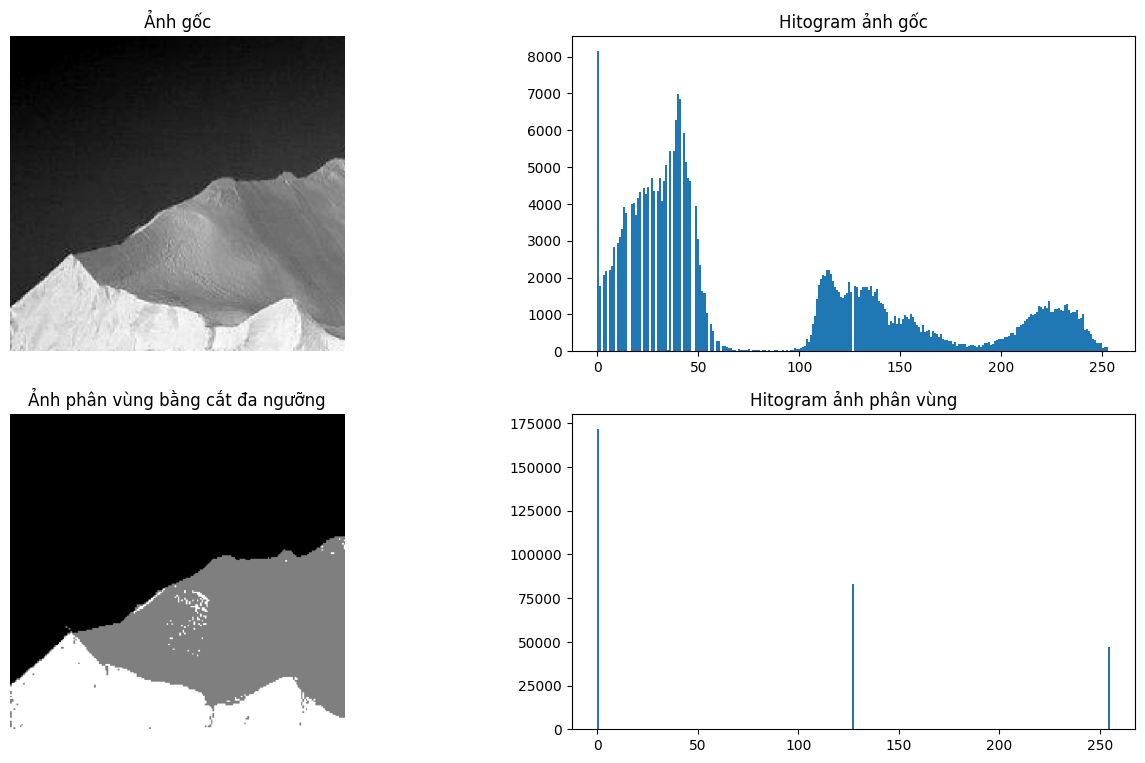

In [ ]:
def phan_vung_bang_cat_nguong(img,T1,T2):
    m, n = img.shape
    img_phan_vung_cat_nguong = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            if (img[i,j] < T1):
                img_phan_vung_cat_nguong[i,j] = 0
            elif (img[i,j] < T2):
                img_phan_vung_cat_nguong[i,j] = 127
            else:
                img_phan_vung_cat_nguong[i, j] = 255
    return img_phan_vung_cat_nguong

if __name__ == "__main__":

    img_goc = cv2.imread("/content/gdrive/MyDrive/python/test2.tif",0)

    T1 = 80
    T2 = 177
    img_phan_vung = phan_vung_bang_cat_nguong(img_goc,T1,T2)


    fig2 = plt.figure(figsize=(16, 9))

    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
    # Hiển thị ảnh gốc
    ax1.imshow(img_goc, cmap='gray')
    ax1.set_title('Ảnh gốc')
    ax1.axis('off')

    # Hiển thị histogram ảnh gốc
    ax2.hist(img_goc.flatten(),bins=256)
    ax2.set_title('Hitogram ảnh gốc')

    # Hiển thị ảnh phân vùng
    ax3.imshow(img_phan_vung, cmap='gray')
    ax3.set_title('Ảnh phân vùng bằng cắt đa ngưỡng')
    ax3.axis('off')

    # Hiển thị histogram ảnh phân vùng
    ax4.hist(img_phan_vung.flatten(), bins=256)
    ax4.set_title('Hitogram ảnh phân vùng')
    plt.show()

Phân vùng ảnh bằng cắt ngưỡng thích nghi dựa trên Thuộc tính vùng ảnh cục bộ

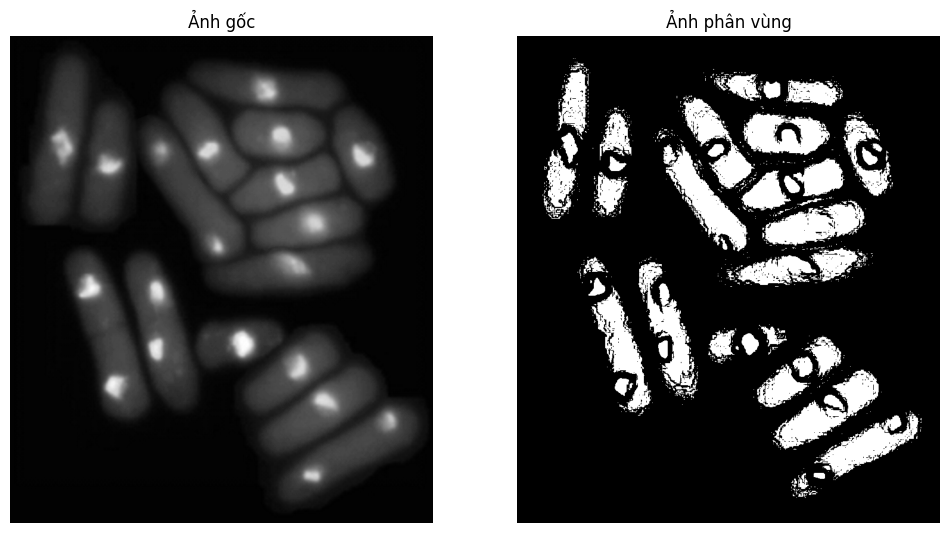

In [ ]:
def Phan_vung_lan_can(img, ksize):
    m, n = img.shape
    img_ket_qua_phan_vung = np.zeros([m, n])
    h=(ksize -1) // 2
    a=20
    b=1
    padded_img = np.pad(img, (h, h), mode='reflect')
    mG = np.mean(padded_img)   # Bước 1. Tính trung bình mức xám ảnh
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            Do_lech_chuan = np.std(vung_anh_kich_thuoc_k) # Bước 1. Tính độ lệch chuẩn cục bộ
            T= a*Do_lech_chuan + b*mG   # Bước 2. Tính ngưỡng theo công thức
            if padded_img[i, j] > T:    # Bước 3. Cắt ngưỡng theo công thức
                img_ket_qua_phan_vung[i, j] = 255
            else:
                img_ket_qua_phan_vung[i, j] = 0
    return img_ket_qua_phan_vung

if __name__ == "__main__":
    img_goc = cv2.imread('/content/gdrive/MyDrive/python/test1.tif', 0)
    ksize = 3
    img_ket_qua = Phan_vung_lan_can(img_goc, ksize)

    fig = plt.figure(figsize=(12, 8))
    (ax1, ax2) = fig.subplots(1, 2)
    ax1.imshow(img_goc, cmap='gray')      # Hiển thị ảnh gốc vùng ax1
    ax1.set_title("Ảnh gốc")
    ax1.axis("off")

    ax2.imshow(img_ket_qua, cmap='gray')  # Hiển thị ảnh sau khi lọc
    ax2.set_title("Ảnh phân vùng")
    ax2.axis("off")

    plt.show()